In [1]:
import sys
import os
import torch
import numpy as np
sys.path.append(os.getcwd())
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from src.clustering.cluster_ae_latent import predict_and_save_latent
import random


In [2]:
save_path = 'output/latent_label_pairs.npy'
checkpoint_path = 'output/2025-02-17/22-21-07/pointnet-epoch=359-val_loss=0.09.ckpt'
liquid_file_path = 'datasets/Al/inherent_configurations_off/166ps.off'
crystal_file_path = 'datasets/Al/inherent_configurations_off/240ps.off'

predict_and_save_latent(checkpoint_path,
                        liquid_file_path,
                        crystal_file_path,
                        device='cuda')

/home/infres/vmorozov/miniconda3/envs/pointnet/lib/python3.12/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'Al_autoencoder': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)
PointNetAE_Transformer_Folding
Loss: chamfer_kl_divergence_loss


Processing liquid dataset ...
Loading cached file from datasets/Al/inherent_configurations_off/166ps.npy


Avg added 1.35 points, avg dropped 10.1 points


Number of samples in spheric dataset: 50653
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([1501, 256])
Processing crystal dataset ...
Loading cached file from datasets/Al/inherent_configurations_off/240ps.npy


Avg added 0.01 points, avg dropped 14.11 points


Number of samples in spheric dataset: 46656
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([4096, 256])
torch.Size([1600, 256])
Created latent-label pairs tensor with shape: (97309, 2)
Saved latent-label pairs to output/latent_label_pairs.npy.


In [3]:
npy_file="output/latent_label_pairs.npy"

output_image="latent_tsne.png"

# Load the latent-label pairs.
print("Loading latent-label pairs from:", npy_file)
latent_label_pairs = np.load(npy_file, allow_pickle=True)
# take only some random points
latent_label_pairs = random.sample(list(latent_label_pairs), 10000)
latent_label_pairs = np.array(latent_label_pairs)
latents = []
labels = []
for latent, label in latent_label_pairs:
    latents.append(latent)
    labels.append(label)

latents = np.stack(latents, axis=0)
labels = np.array(labels)

Loading latent-label pairs from: output/latent_label_pairs.npy


In [4]:
# t-SNE
perplexity=20
n_iter=2000
random_state=42
print("Performing t-SNE on latent representations...")
tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=n_iter, random_state=random_state)
tsne_results = tsne.fit_transform(latents)

Performing t-SNE on latent representations...


Saved t-SNE plot to: latent_tsne.png


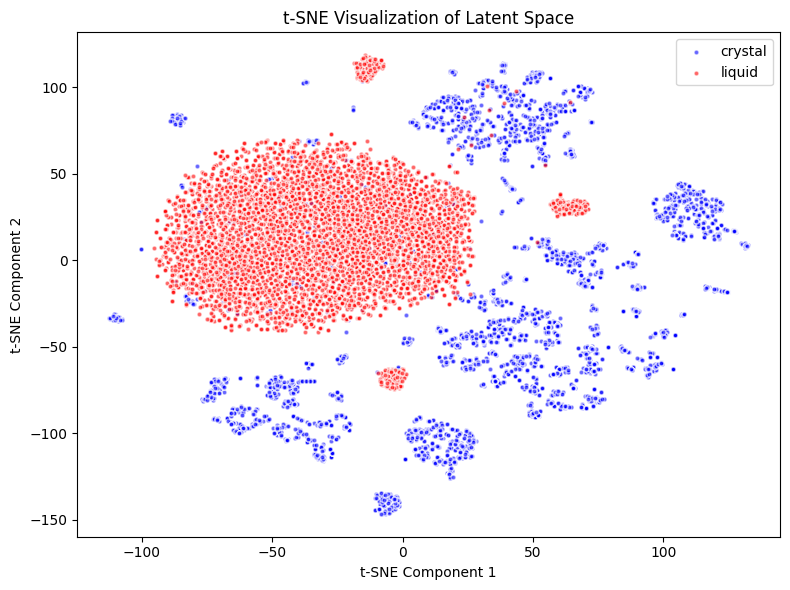

In [5]:
unique_labels = sorted(set(labels))
color_list = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
color_map = {label: color_list[i % len(color_list)] for i, label in enumerate(unique_labels)}

plt.figure(figsize=(8, 6))
for label in unique_labels:
    indices = np.where(labels == label)
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1],
                color=color_map[label], label=label,
                alpha=0.6, edgecolors='w', s=12)

plt.title("t-SNE Visualization of Latent Space")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.tight_layout()
plt.savefig(output_image, dpi=300)
print("Saved t-SNE plot to:", output_image)
plt.show()

Performing PCA on latent representations...


Saved PCA plot to: latent_pca.png


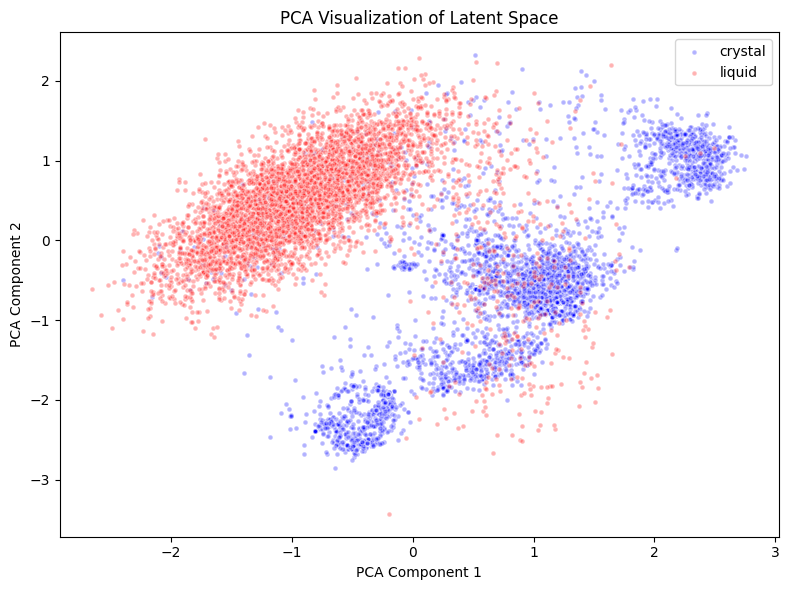

In [6]:
# PCA
from sklearn.decomposition import PCA

print("Performing PCA on latent representations...")
pca = PCA(n_components=2)
pca_results = pca.fit_transform(latents)

# Determine unique labels and prepare color map.
unique_labels = sorted(set(labels))
color_list = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
color_map = {label: color_list[i % len(color_list)] for i, label in enumerate(unique_labels)}

# Create the scatter plot for PCA results.
plt.figure(figsize=(8, 6))
for label in unique_labels:
    indices = np.where(labels == label)
    plt.scatter(pca_results[indices, 0], pca_results[indices, 1],
                color=color_map[label], label=label,
                alpha=0.3, edgecolors='w', s=12)

plt.title("PCA Visualization of Latent Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.tight_layout()
plt.savefig("latent_pca.png", dpi=300)
print("Saved PCA plot to:", "latent_pca.png")
plt.show()

Performing KMeans clustering with 2 clusters on latent representations...
Computing PCA for clustering visualization...
Saved clustering plot to: latent_kmeans_clustering.png


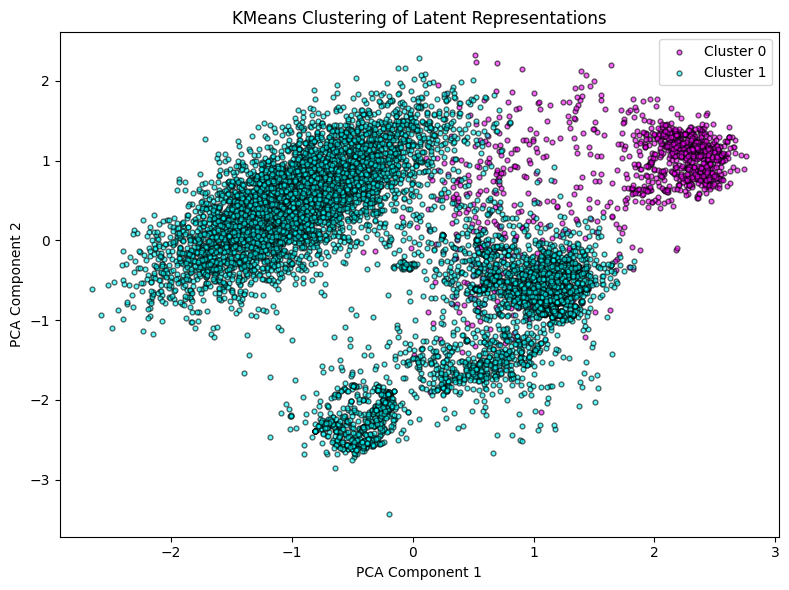

In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print("Performing KMeans clustering with 2 clusters on latent representations...")
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(latents)

print("Computing PCA for clustering visualization...")
pca_cluster = PCA(n_components=2)
pca_cluster_results = pca_cluster.fit_transform(latents)

cluster_color_map = {0: 'magenta', 1: 'cyan'}

plt.figure(figsize=(8, 6))
for cl in np.unique(cluster_labels):
    indices = np.where(cluster_labels == cl)
    plt.scatter(pca_cluster_results[indices, 0], pca_cluster_results[indices, 1],
                color=cluster_color_map[cl], label=f"Cluster {cl}",
                alpha=0.6, edgecolors='k', s=12)

plt.title("KMeans Clustering of Latent Representations")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.tight_layout()
plt.savefig("latent_kmeans_clustering.png", dpi=300)
print("Saved clustering plot to: latent_kmeans_clustering.png")
plt.show()


In [8]:
# Classification metrics for clustering results
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.optimize import linear_sum_assignment
import numpy as np

# Encode true labels (if not already numeric)
le = LabelEncoder()
true_labels_encoded = le.fit_transform(labels)

# Calculate Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI)
ari = adjusted_rand_score(true_labels_encoded, cluster_labels)
nmi = normalized_mutual_info_score(true_labels_encoded, cluster_labels)

# Compute the confusion matrix between true labels and cluster predictions
cm = confusion_matrix(true_labels_encoded, cluster_labels)

# Use the Hungarian algorithm to determine the best mapping between cluster labels and true labels
row_ind, col_ind = linear_sum_assignment(-cm)
acc = cm[row_ind, col_ind].sum() / cm.sum()


print("Clustering Accuracy(Best):", acc)
print("\nConfusion Matrix:\n", cm)
print(classification_report(true_labels_encoded, cluster_labels, target_names=le.classes_))

Clustering Accuracy(Best): 0.5962

Confusion Matrix:
 [[1043 3756]
 [ 282 4919]]
              precision    recall  f1-score   support

     crystal       0.79      0.22      0.34      4799
      liquid       0.57      0.95      0.71      5201

    accuracy                           0.60     10000
   macro avg       0.68      0.58      0.52     10000
weighted avg       0.67      0.60      0.53     10000

